In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import pickle
import sys
import os
import seaborn as sns
sys.path.append('../')
import catrace.exp_collection as ecl
import catrace.process_time_trace as ptt
import catrace.dim_reduce as catdr
import catrace.scale as catsc
import catrace.cluster as catclust

In [2]:
exp_list = [( '2021-02-05-DpOBEM-JH9','phe-arg'),
            ('2021-03-18-DpOBEM-JH10','phe-arg'),
            ('2021-03-19-DpOBEM-JH10','phe-arg'),
            ('2021-04-02-DpOBEM-JH11','phe-arg'),
            ('2021-04-03-DpOBEM-JH11','phe-arg'),
            ('2021-05-01-DpOBEM-JH13','phe-arg'),
            ('2021-05-22-DpOBEM-JH14','phe-arg'),
            ('2021-07-15-DpOBEM-N2'  ,'naive'),
            ('2021-07-16-DpOBEM-N3' ,'naive'),
            ('2021-07-30-DpOBEM-JH17','arg-phe'),
            ('2021-07-31-DpOBEM-JH17','arg-phe'),
            ('2021-09-02-DpOBEM-JH18','arg-phe'),
            ('2021-09-03-DpOBEM-JH18','arg-phe'),
            ('2021-09-04-DpOBEM-JH18','arg-phe'),
            ('2021-09-15-DpOBEM-JH20','phe-arg'),
            ('2021-09-17-DpOBEM-JH20','phe-arg'),
            ('2021-09-18-DpOBEM-JH20','phe-arg'),
            ('2021-09-29-DpOBEM-JH21','arg-phe'),
            ('2021-10-01-DpOBEM-JH21','arg-phe'),
            ('2021-10-02-DpOBEM-JH21','arg-phe'),
            ('2021-11-10-DpOBEM-JH23','phe-trp'),
            ('2021-11-14-DpOBEM-JH23','phe-trp'),
            ('2021-11-24-DpOBEM-JH24','phe-trp'),
            ('2021-11-27-DpOBEM-JH24','phe-trp'),
            ('2021-11-26-DpOBEM-JH24','phe-trp'),
            ('2021-12-10-DpOBEM-N4','naive'),
            ('2021-12-31-DpOBEM-N7','naive'),
            ('2022-01-23-DpOBEM-N8','naive'),
            ('2022-01-30-DpOBEM-N9','naive'),
            ('2022-02-13-DpOBEM-N10','naive'),
            ('2022-02-20-DpOBEM-N11','naive')]

region_list = ['Dp', 'OB']
frame_rate = 30/4
#num_trial = 3
exp_info = dict(num_trial=3)
odor_list = ['phe', 'trp', 'arg', 'tdca', 'tca', 'gca', 'acsf', 'spont']
#plane_nb_list = np.array([1,2,3,4]) - 1
data_root_dir = '/media/hubo/WD_BoHu/Ca_imaging/results/'
db_dir = '/media/hubo/WD_BoHu/Ca_imaging/results/JH_analysis/data'
load_data = False

In [44]:
importlib.reload(ecl)
load_dfovf_db = ecl.process_data_db_decorator(ecl.load_dfovf, exp_list, region_list, 'dfovf', db_dir)
load_dfovf_db(data_root_dir)

2021-02-05-DpOBEM-JH9 Dp
2021-02-05-DpOBEM-JH9 OB
2021-03-18-DpOBEM-JH10 Dp
2021-03-18-DpOBEM-JH10 OB
2021-03-19-DpOBEM-JH10 Dp
2021-03-19-DpOBEM-JH10 OB
2021-04-02-DpOBEM-JH11 Dp
2021-04-02-DpOBEM-JH11 OB
2021-04-03-DpOBEM-JH11 Dp
2021-04-03-DpOBEM-JH11 OB
2021-05-01-DpOBEM-JH13 Dp
2021-05-01-DpOBEM-JH13 OB
2021-05-22-DpOBEM-JH14 Dp
2021-05-22-DpOBEM-JH14 OB
2021-07-15-DpOBEM-N2 Dp
2021-07-15-DpOBEM-N2 OB
2021-07-16-DpOBEM-N3 Dp
2021-07-16-DpOBEM-N3 OB
2021-07-30-DpOBEM-JH17 Dp
2021-07-30-DpOBEM-JH17 OB
2021-07-31-DpOBEM-JH17 Dp
2021-07-31-DpOBEM-JH17 OB
2021-09-02-DpOBEM-JH18 Dp
2021-09-02-DpOBEM-JH18 OB
2021-09-03-DpOBEM-JH18 Dp
2021-09-03-DpOBEM-JH18 OB
2021-09-04-DpOBEM-JH18 Dp
2021-09-04-DpOBEM-JH18 OB
2021-09-15-DpOBEM-JH20 Dp
2021-09-15-DpOBEM-JH20 OB
2021-09-17-DpOBEM-JH20 Dp
2021-09-17-DpOBEM-JH20 OB
2021-09-18-DpOBEM-JH20 Dp
2021-09-18-DpOBEM-JH20 OB
2021-09-29-DpOBEM-JH21 Dp
2021-09-29-DpOBEM-JH21 OB
2021-10-01-DpOBEM-JH21 Dp
2021-10-01-DpOBEM-JH21 OB
2021-10-02-DpOBEM-JH21

In [47]:
importlib.reload(ecl)
select_neuron_explist = ecl.process_data_db_decorator(ptt.select_neuron, exp_list, region_list,
                                                      'dfovf_select', db_dir, 'dfovf')
thresh = 5.5
select_neuron_explist(thresh)

2021-02-05-DpOBEM-JH9 Dp
2021-02-05-DpOBEM-JH9 OB
2021-03-18-DpOBEM-JH10 Dp
2021-03-18-DpOBEM-JH10 OB
2021-03-19-DpOBEM-JH10 Dp
2021-03-19-DpOBEM-JH10 OB
2021-04-02-DpOBEM-JH11 Dp
2021-04-02-DpOBEM-JH11 OB
2021-04-03-DpOBEM-JH11 Dp
2021-04-03-DpOBEM-JH11 OB
2021-05-01-DpOBEM-JH13 Dp
2021-05-01-DpOBEM-JH13 OB
2021-05-22-DpOBEM-JH14 Dp
2021-05-22-DpOBEM-JH14 OB
2021-07-15-DpOBEM-N2 Dp
2021-07-15-DpOBEM-N2 OB
2021-07-16-DpOBEM-N3 Dp
2021-07-16-DpOBEM-N3 OB
2021-07-30-DpOBEM-JH17 Dp
2021-07-30-DpOBEM-JH17 OB
2021-07-31-DpOBEM-JH17 Dp
2021-07-31-DpOBEM-JH17 OB
2021-09-02-DpOBEM-JH18 Dp
2021-09-02-DpOBEM-JH18 OB
2021-09-03-DpOBEM-JH18 Dp
2021-09-03-DpOBEM-JH18 OB
2021-09-04-DpOBEM-JH18 Dp
2021-09-04-DpOBEM-JH18 OB
2021-09-15-DpOBEM-JH20 Dp
2021-09-15-DpOBEM-JH20 OB
2021-09-17-DpOBEM-JH20 Dp
2021-09-17-DpOBEM-JH20 OB
2021-09-18-DpOBEM-JH20 Dp
2021-09-18-DpOBEM-JH20 OB
2021-09-29-DpOBEM-JH21 Dp
2021-09-29-DpOBEM-JH21 OB
2021-10-01-DpOBEM-JH21 Dp
2021-10-01-DpOBEM-JH21 OB
2021-10-02-DpOBEM-JH21

In [48]:
compute_pattern_explist = ecl.process_data_db_decorator(ptt.bin_and_restack, exp_list, region_list,
                                                        'pattern', db_dir, 'dfovf_select')
tbin = 5
pattern_dict = compute_pattern_explist(tbin)

2021-02-05-DpOBEM-JH9 Dp
2021-02-05-DpOBEM-JH9 OB
2021-03-18-DpOBEM-JH10 Dp
2021-03-18-DpOBEM-JH10 OB
2021-03-19-DpOBEM-JH10 Dp
2021-03-19-DpOBEM-JH10 OB
2021-04-02-DpOBEM-JH11 Dp
2021-04-02-DpOBEM-JH11 OB
2021-04-03-DpOBEM-JH11 Dp
2021-04-03-DpOBEM-JH11 OB
2021-05-01-DpOBEM-JH13 Dp
2021-05-01-DpOBEM-JH13 OB
2021-05-22-DpOBEM-JH14 Dp
2021-05-22-DpOBEM-JH14 OB
2021-07-15-DpOBEM-N2 Dp
2021-07-15-DpOBEM-N2 OB
2021-07-16-DpOBEM-N3 Dp
2021-07-16-DpOBEM-N3 OB
2021-07-30-DpOBEM-JH17 Dp
2021-07-30-DpOBEM-JH17 OB
2021-07-31-DpOBEM-JH17 Dp
2021-07-31-DpOBEM-JH17 OB
2021-09-02-DpOBEM-JH18 Dp
2021-09-02-DpOBEM-JH18 OB
2021-09-03-DpOBEM-JH18 Dp
2021-09-03-DpOBEM-JH18 OB
2021-09-04-DpOBEM-JH18 Dp
2021-09-04-DpOBEM-JH18 OB
2021-09-15-DpOBEM-JH20 Dp
2021-09-15-DpOBEM-JH20 OB
2021-09-17-DpOBEM-JH20 Dp
2021-09-17-DpOBEM-JH20 OB
2021-09-18-DpOBEM-JH20 Dp
2021-09-18-DpOBEM-JH20 OB
2021-09-29-DpOBEM-JH21 Dp
2021-09-29-DpOBEM-JH21 OB
2021-10-01-DpOBEM-JH21 Dp
2021-10-01-DpOBEM-JH21 OB
2021-10-02-DpOBEM-JH21

In [50]:
standardize_explist = ecl.process_data_db_decorator(catsc.quantile_all, exp_list, region_list, 'std_pattern', db_dir, 'pattern')
standardize_explist(q=1)

2021-02-05-DpOBEM-JH9 Dp
2021-02-05-DpOBEM-JH9 OB
2021-03-18-DpOBEM-JH10 Dp
2021-03-18-DpOBEM-JH10 OB


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

2021-03-19-DpOBEM-JH10 Dp
2021-03-19-DpOBEM-JH10 OB
2021-04-02-DpOBEM-JH11 Dp
2021-04-02-DpOBEM-JH11 OB


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

2021-04-03-DpOBEM-JH11 Dp
2021-04-03-DpOBEM-JH11 OB
2021-05-01-DpOBEM-JH13 Dp
2021-05-01-DpOBEM-JH13 OB


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

2021-05-22-DpOBEM-JH14 Dp
2021-05-22-DpOBEM-JH14 OB
2021-07-15-DpOBEM-N2 Dp
2021-07-15-DpOBEM-N2 OB
2021-07-16-DpOBEM-N3 Dp
2021-07-16-DpOBEM-N3 OB


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

2021-07-30-DpOBEM-JH17 Dp
2021-07-30-DpOBEM-JH17 OB
2021-07-31-DpOBEM-JH17 Dp
2021-07-31-DpOBEM-JH17 OB
2021-09-02-DpOBEM-JH18 Dp


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

2021-09-02-DpOBEM-JH18 OB
2021-09-03-DpOBEM-JH18 Dp
2021-09-03-DpOBEM-JH18 OB
2021-09-04-DpOBEM-JH18 Dp
2021-09-04-DpOBEM-JH18 OB


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

2021-09-15-DpOBEM-JH20 Dp
2021-09-15-DpOBEM-JH20 OB
2021-09-17-DpOBEM-JH20 Dp
2021-09-17-DpOBEM-JH20 OB
2021-09-18-DpOBEM-JH20 Dp
2021-09-18-DpOBEM-JH20 OB


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

2021-09-29-DpOBEM-JH21 Dp
2021-09-29-DpOBEM-JH21 OB
2021-10-01-DpOBEM-JH21 Dp
2021-10-01-DpOBEM-JH21 OB
2021-10-02-DpOBEM-JH21 Dp


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

2021-10-02-DpOBEM-JH21 OB
2021-11-10-DpOBEM-JH23 Dp
2021-11-10-DpOBEM-JH23 OB
2021-11-14-DpOBEM-JH23 Dp
2021-11-14-DpOBEM-JH23 OB


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

2021-11-24-DpOBEM-JH24 Dp
2021-11-24-DpOBEM-JH24 OB
2021-11-27-DpOBEM-JH24 Dp
2021-11-27-DpOBEM-JH24 OB
2021-11-26-DpOBEM-JH24 Dp


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

2021-11-26-DpOBEM-JH24 OB
2021-12-10-DpOBEM-N4 Dp
2021-12-10-DpOBEM-N4 OB
2021-12-31-DpOBEM-N7 Dp
2021-12-31-DpOBEM-N7 OB


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

2022-01-23-DpOBEM-N8 Dp
2022-01-23-DpOBEM-N8 OB
2022-01-30-DpOBEM-N9 Dp
2022-01-30-DpOBEM-N9 OB
2022-02-13-DpOBEM-N10 Dp


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

2022-02-13-DpOBEM-N10 OB
2022-02-20-DpOBEM-N11 Dp
2022-02-20-DpOBEM-N11 OB


In [3]:
# Pool all experiments
importlib.reload(ecl)
std_pattern_df = ecl.concatenate_df_from_db(exp_list, region_list, 'std_pattern', db_dir)

2021-02-05-DpOBEM-JH9 Dp
2021-02-05-DpOBEM-JH9 OB
2021-03-18-DpOBEM-JH10 Dp
2021-03-18-DpOBEM-JH10 OB
2021-03-19-DpOBEM-JH10 Dp
2021-03-19-DpOBEM-JH10 OB
2021-04-02-DpOBEM-JH11 Dp
2021-04-02-DpOBEM-JH11 OB
2021-04-03-DpOBEM-JH11 Dp
2021-04-03-DpOBEM-JH11 OB
2021-05-01-DpOBEM-JH13 Dp
2021-05-01-DpOBEM-JH13 OB
2021-05-22-DpOBEM-JH14 Dp
2021-05-22-DpOBEM-JH14 OB
2021-07-15-DpOBEM-N2 Dp
2021-07-15-DpOBEM-N2 OB
2021-07-16-DpOBEM-N3 Dp
2021-07-16-DpOBEM-N3 OB
2021-07-30-DpOBEM-JH17 Dp
2021-07-30-DpOBEM-JH17 OB
2021-07-31-DpOBEM-JH17 Dp
2021-07-31-DpOBEM-JH17 OB
2021-09-02-DpOBEM-JH18 Dp
2021-09-02-DpOBEM-JH18 OB
2021-09-03-DpOBEM-JH18 Dp
2021-09-03-DpOBEM-JH18 OB
2021-09-04-DpOBEM-JH18 Dp
2021-09-04-DpOBEM-JH18 OB
2021-09-15-DpOBEM-JH20 Dp
2021-09-15-DpOBEM-JH20 OB
2021-09-17-DpOBEM-JH20 Dp
2021-09-17-DpOBEM-JH20 OB
2021-09-18-DpOBEM-JH20 Dp
2021-09-18-DpOBEM-JH20 OB
2021-09-29-DpOBEM-JH21 Dp
2021-09-29-DpOBEM-JH21 OB
2021-10-01-DpOBEM-JH21 Dp
2021-10-01-DpOBEM-JH21 OB
2021-10-02-DpOBEM-JH21

In [21]:
std_pattern_df

fish_id          2021-02-05-DpOBEM-JH9                                \
region                              Dp                                 
cond                           phe-arg                                 
plane                                0                                 
neuron                             0         1         2         3     
odor  trial time                                                       
phe   0     0                -0.031730 -0.024059 -0.046929 -0.075448   
            1                -0.019268 -0.032301 -0.077136 -0.048125   
            2                -0.025070 -0.032670 -0.008361 -0.022251   
            3                -0.013339 -0.021197  0.004136 -0.039768   
            4                -0.026119 -0.020947 -0.052827 -0.020191   
...                                ...       ...       ...       ...   
spont 2     28                0.113492 -0.022167 -0.078168 -0.085631   
            29                0.093765 -0.032384 -0.060441 -0.069007   
            30                0.038916 -0.008747 -0.071621 -0.053477   
            31                0.001973 -0.016516 -0.066851 -0.074184   
            32               -0.000671 -0.010220 -0.053333 -0.095563   

fish_id                                                                       \
region                                                                         
cond                                                                           
plane                                                                          
neuron                 5         6         7         11        16        21    
odor  trial time                                                               
phe   0     0    -0.000601  0.018462 -0.037612 -0.004964 -0.029940  0.020833   
            1    -0.000505  0.002764 -0.014792 -0.025323 -0.028460 -0.015704   
            2    -0.032078  0.003948 -0.029228  0.006861 -0.026451 -0.004741   
            3    -0.035338 -0.031758 -0.031461 -0.003258 -0.009825 -0.004391   
            4    -0.001945 -0.025102  0.000226 -0.011898 -0.001140 -0.016353   
...                    ...       ...       ...       ...       ...       ...   
spont 2     28   -0.041035  0.039726  0.014096  0.040589 -0.012920 -0.017735   
            29   -0.033071 -0.026396 -0.006229  0.002573 -0.013209 -0.009770   
            30   -0.035986  0.030695  0.036562 -0.014411 -0.029254 -0.005982   
            31   -0.046869  0.019666  0.020675  0.020838 -0.021733 -0.008115   
            32   -0.035737  0.010450 -0.002084  0.023460 -0.033146  0.001957   

fish_id           ... 2022-02-20-DpOBEM-N11                                \
region            ...                    OB                                 
cond              ...                 naive                                 
plane             ...                     3                                 
neuron            ...                   226       227       228       231   
odor  trial time  ...                                                       
phe   0     0     ...             -0.030431 -0.041814 -0.015158 -0.031467   
            1     ...             -0.059881 -0.040798 -0.022330 -0.022759   
            2     ...             -0.060098 -0.008309 -0.030942 -0.034237   
            3     ...             -0.027358 -0.040644 -0.009765 -0.029753   
            4     ...             -0.022759 -0.032573 -0.005911 -0.021507   
...               ...                   ...       ...       ...       ...   
spont 2     28    ...             -0.015934  0.006832 -0.019863  0.001049   
            29    ...             -0.019302 -0.001765 -0.007151 -0.002114   
            30    ...             -0.013941 -0.007976 -0.020095 -0.008749   
            31    ...             -0.034890  0.012100 -0.014332 -0.007045   
            32    ...             -0.023489 -0.016062 -0.005620  0.012993   

fish_id                                                                       
region                   

In [79]:
df = std_pattern_df.xs(('2021-02-05-DpOBEM-JH9','Dp'), axis=1, level=['fish_id','region'])
n_components = 5
results = catdr.compute_fa(df, n_components)

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


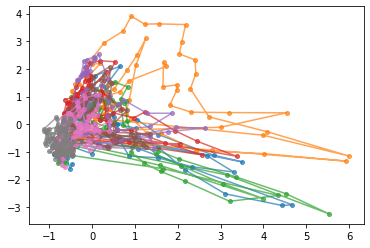

In [83]:
catdr.plot_embed_2d(results, (0,1))

In [15]:
# suppress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [36]:
importlib.reload(ecl)
importlib.reload(catdr)
compute_cv_db = ecl.process_data_dict_decorator(catdr.compute_cv_scores, exp_list, region_list,
                                                db_dir, 'std_pattern')
max_ncomp = 50
step_size = 2
cv_dict = compute_cv_db(max_ncomp, step_size)

2021-02-05-DpOBEM-JH9 Dp
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
2021-02-05-DpOBEM-JH9 OB
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
2021-03-18-DpOBEM-JH10 Dp
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
2021-03-18-DpOBEM-JH10 OB
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
2021-03-19-DpOBEM-JH10 Dp
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
2021-03-19-DpOBEM-JH10 OB
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
2021-04-02-DpOBEM-JH11 Dp
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
2021-04-02-DpOBEM-JH11 OB
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
2021-04-03-DpOBEM-JH11 Dp
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
2021-04-03-DpOBEM-JH11 OB
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
2021-05-01-DpOBEM-JH13 Dp
0
2
4
6
8
10
12


In [41]:
cvfile = os.path.join(db_dir, 'cv_dict.pkl')
pickle.dump(cv_dict, open(cvfile, 'wb'))

In [3]:
cvfile = os.path.join(db_dir, 'cv_dict.pkl')
cv2 = pickle.load(open(cvfile, 'rb'))

In [46]:
cv2

{'2021-02-05-DpOBEM-JH9': {'Dp': {'ncomp_list': array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
          34, 36, 38, 40, 42, 44, 46, 48]),
   'pca_scores': [1245.8727249834042,
    1293.9173091475307,
    1308.3867807803629,
    1313.5301415735855,
    1317.6653509817463,
    1316.298594092749,
    1314.8926833802411,
    1311.1115003953194,
    1305.6733477596413,
    1300.2272769773301,
    1294.7692449232904,
    1290.388590709484,
    1286.9051886949076,
    1284.4602453749171,
    1283.6252225334702,
    1282.428710436536,
    1280.3559298092396,
    1279.7172826301692,
    1279.9587435675126,
    1281.2928421346198,
    1281.1543084750988,
    1279.440381735442,
    1278.1706035446944,
    1277.1457967618758,
    1275.0992395761555],
   'fa_scores': [1341.9202882693887,
    1372.7018239953109,
    1370.3165291743735,
    1369.0793436473593,
    1365.8185869836539,
    1362.8543208169322,
    1357.6788633497924,
    1352.213421210639,
    1345.641351019

In [4]:
def convert_to_score_df(results):
    df = pd.DataFrame.from_dict(results)
    df = df.set_index('ncomp_list')
    return df
def flatten(t):
    return [item for sublist in t for item in sublist]

In [5]:
all_scores = [[convert_to_score_df(val2)\
              for region, val2 in val.items()]\
              for exp_name, val in cv2.items()]
all_scores = flatten(all_scores)

In [6]:
expkey_list = [[(exp_name, region)\
              for region, val2 in val.items()]\
              for exp_name, val in cv2.items()]
expkey_list = flatten(expkey_list)

In [7]:
all_normed_scores = [df/df.pca_scores.max() for df in all_scores]

In [8]:
normed_score_df = pd.concat(all_normed_scores, keys=expkey_list, names=['fish_id','region'])
normed_score_df = pd.melt(normed_score_df, var_name='method', ignore_index=False)
normed_score_df = normed_score_df.reset_index(level='ncomp_list')
normed_score_df
#dp_nsc = normed_score_df.loc['Dp']
dp_nsc = normed_score_df.xs('Dp', level='region')
ob_nsc = normed_score_df.xs('OB', level='region')

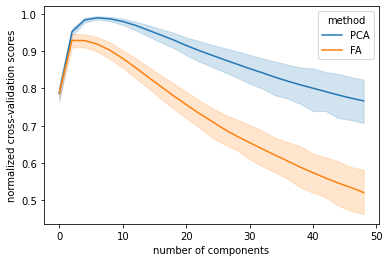

In [9]:
ax = sns.lineplot(data=ob_nsc.reset_index(), x='ncomp_list', y='value', hue='method')
ax.set_xlabel('number of components')
ax.set_ylabel('normalized cross-validation scores')
# replace labels
new_labels = ['PCA', 'FA']
for t, l in zip(ax.get_legend().texts, new_labels):
    t.set_text(l)

In [10]:
score_df = pd.concat(all_scores, keys=expkey_list, names=['fish_id','region'])

In [11]:
all_best_ncomp = [[pd.DataFrame.from_dict(catdr.get_best_ncomp(val2))\
                  for region, val2 in val.items()]\
                  for exp_name, val in cv2.items()]
all_best_ncomp = flatten(all_best_ncomp)
best_ncomp_df = pd.concat(all_best_ncomp, keys=expkey_list, names=['fish_id', 'region'])

best_ncomp_df.index = best_ncomp_df.index.set_names('data', level=-1)
best_ncomp_df
best_ncdf = best_ncomp_df.xs('best_ncomp', level='data')
best_scdf = best_ncomp_df.xs('best_score', level='data')

In [12]:
best_ncdf = best_ncomp_df.xs('best_ncomp', level='data')
best_scdf = best_ncomp_df.xs('best_score', level='data')
#best_ncdf = best_ncdf.reset_index(level='region') 

best_ncdf_melt = pd.melt(best_ncdf, var_name='method', ignore_index=False)
best_ncdf_melt = best_ncdf_melt.reset_index(level='region')
best_ncdf_melt

region method  value
fish_id                                    
2021-02-05-DpOBEM-JH9      Dp    pca    8.0
2021-02-05-DpOBEM-JH9      OB    pca   14.0
2021-03-18-DpOBEM-JH10     Dp    pca   14.0
2021-03-18-DpOBEM-JH10     OB    pca   18.0
2021-03-19-DpOBEM-JH10     Dp    pca   14.0
...                       ...    ...    ...
2022-01-30-DpOBEM-N9       OB     fa    2.0
2022-02-13-DpOBEM-N10      Dp     fa    6.0
2022-02-13-DpOBEM-N10      OB     fa    2.0
2022-02-20-DpOBEM-N11      Dp     fa    4.0
2022-02-20-DpOBEM-N11      OB     fa    2.0

[124 rows x 3 columns]

Text(0, 0.5, 'Best #components')

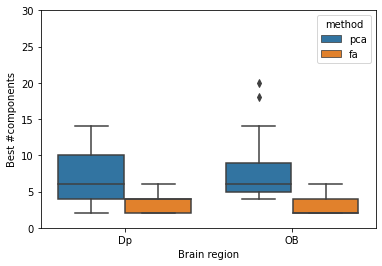

In [14]:
import seaborn as sns
sns.boxplot(x="region", y="value", hue="method", data=best_ncdf_melt)
plt.ylim((0,30))
plt.xlabel('Brain region')
plt.ylabel('Best #components')

In [57]:
region = 'Dp'
all_scores = [pd.DataFrame.from_dict(cv2[exp_name][region])for exp_name in cv2.keys()]
score_df = pd.concat(all_scores, keys=cv2.keys(), names=['fish_id'])

In [59]:
importlib.reload(catdr)
all_best_ncomp = [pd.DataFrame.from_dict(catdr.get_best_ncomp(cv2[exp_name][region]))for exp_name in cv2.keys()]
best_ncomp_df = pd.concat(all_best_ncomp, keys=cv2.keys(), names=['fish_id'])
best_ncomp_df.index = best_ncomp_df.index.set_names('data', level=1)
best_ncdf = best_ncomp_df.xs('best_ncomp', level='data')
best_scdf = best_ncomp_df.xs('best_score', level='data')

(0.0, 15.0)

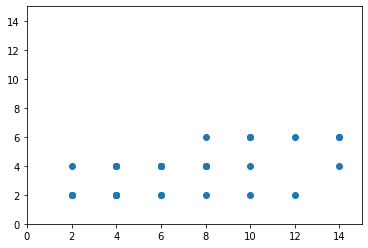

In [60]:
plt.scatter(best_ncdf['pca'], best_ncdf['fa'])
plt.xlim((0,15))
plt.ylim((0,15))

In [62]:
best_ncdf['pca'].mean()

7.032258064516129

<AxesSubplot:>

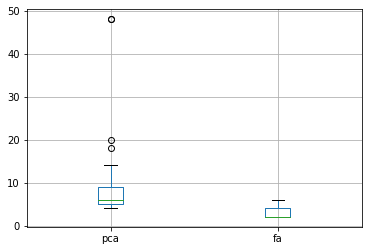

In [53]:
best_ncdf.boxplot()

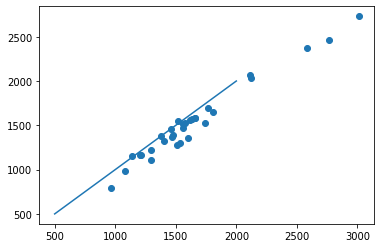

In [54]:
plt.scatter(best_scdf['pca'], best_scdf['fa'])
plt.plot([500, 2000], [500, 2000])
#plt.xlim((0,15))
#plt.ylim((0,15))

In [ ]:
best_ncomp_df.xs("one", level="second")

In [ ]:
best_ncomp_df

<AxesSubplot:xlabel='fish_id,ncomp_list'>

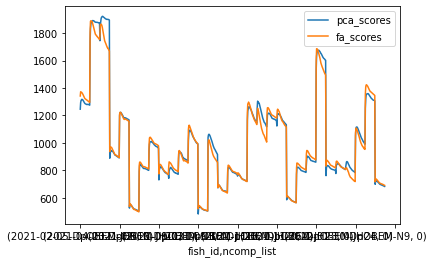

In [22]:
score_df.plot()

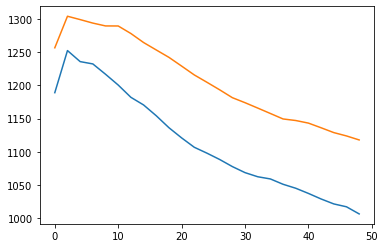

In [49]:
cv_results = cv2['2021-10-01-DpOBEM-JH21']['Dp']
plt.plot(cv_results['ncomp_list'], cv_results['fa_scores'])
plt.plot(cv_results['ncomp_list'], cv_results['pca_scores'])

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [8]:
region = 'Dp'
X = std_pattern_dict[region][exp_name]

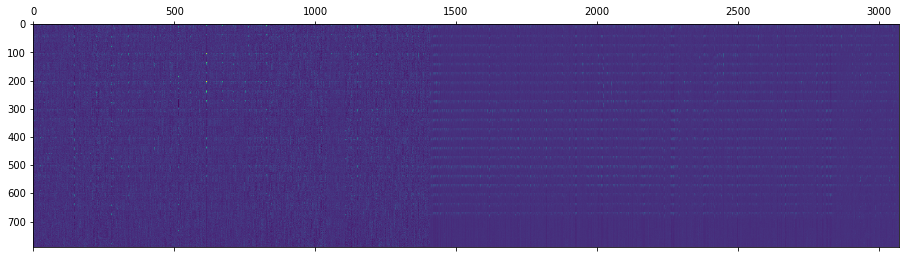

In [9]:
X1 = std_pattern_dict['Dp'][exp_name]
X2 = std_pattern_dict['OB'][exp_name]
scale = 4
XC = pd.concat([X1*scale,X2],axis=1)
plt.matshow(XC)

In [20]:
X1

plane                    0                                                    \
neuron                 0         1         2         3         4         5     
odor  trial time                                                               
phe   0     0    -0.020005 -0.023315 -0.028217 -0.021188 -0.009628 -0.015635   
            1    -0.002723 -0.029586  0.007512 -0.002414 -0.002569  0.001706   
            2     0.010181 -0.030000 -0.022995 -0.003691  0.003482 -0.027455   
            3    -0.016390 -0.000313 -0.011917 -0.017548  0.000846  0.027473   
            4    -0.023909 -0.003439 -0.008489 -0.016028 -0.002792 -0.000648   
...                    ...       ...       ...       ...       ...       ...   
spont 2     28    0.009994 -0.013704  0.009261 -0.007968  0.035714 -0.022153   
            29    0.004625 -0.031919  0.002108 -0.000425 -0.012470 -0.039893   
            30   -0.009689  0.006916 -0.007243 -0.027460  0.008750  0.015878   
            31    0.002233 -0.036342  0.001058 -0.008142 -0.017376 -0.002493   
            32    0.020561 -0.014434  0.010484 -0.047191  0.024155 -0.020103   

plane                                                     ...         3  \
neuron                 6         7         8         9    ...       344   
odor  trial time                                          ...             
phe   0     0     0.001423 -0.000341 -0.013553  0.007780  ...  0.042199   
            1    -0.024556 -0.022021 -0.007372 -0.005625  ... -0.019812   
            2     0.031180 -0.007964 -0.013442 -0.009850  ... -0.015480   
            3    -0.030809 -0.005615 -0.032699 -0.007368  ... -0.013912   
            4    -0.038354  0.015179 -0.019288 -0.012061  ... -0.040263   
...                    ...       ...       ...       ...  ...       ...   
spont 2     28   -0.044894 -0.020555 -0.022862  0.011282  ... -0.064905   
            29   -0.024574  0.000284 -0.013378 -0.027892  ... -0.047794   
            30    0.005488 -0.020030 -0.020427  0.004855  ... -0.036844   
            31   -0.042147  0.012053 -0.003796 -0.002477  ... -0.006569   
            32   -0.028597  0.010711 -0.050562  0.009096  ... -0.071713   

plane                                                                         \
neuron                 345       346       347       348       349       350   
odor  trial time                                                               
phe   0     0     0.044424 -0.012541 -0.021857 -0.009270 -0.023034 -0.016627   
            1     0.023166 -0.038486 -0.032445 -0.026585  0.047481 -0.053945   
            2    -0.005810 -0.023717 -0.028562 -0.023312 -0.037994 -0.034102   
            3     0.018195 -0.004474 -0.010314 -0.016330  0.001786 -0.043910   
            4     0.040133 -0.008371 -0.013878  0.001688  0.003790 -0.008257   
...                    ...       ...       ...       ...       ...       ...   
spont 2     28    0.019465 -0.035133 -0.001473  0.012564 -0.019013 -0.031832   
            29   -0.034491 -0.058518  0.011724  0.009320 -0.036246 -0.018124   
            30   -0.000131 -0.027834 -0.009665  0.011316  0.006616 -0.029215   
            31   -0.033563 -0.024236 -0.017170  0.000240 -0.024969 -0.037836   
            32   -0.024134 -0.048115 -0.052786  0.005813 -0.023114 -0.029938   

plane                                           
neuron                 351       352       353  
odor  trial time                                
phe   0     0    -0.033752 -0.012435  0.002951  
            1    -0.010146 -0.011256 -0.024365  
            2    -0.023135 -0.019106 -0.010035  
            3    -0.004676 -0.010193 -0.004992  
            4    -0.028830 -0.003253 -0.019432  
...                    ...       ...       ...  
spont 2     28   -0.034303 -0.001121  0.040871  
            29    0.004426 -0.008073 -0.000357  
            30    0.008171 -0.003732 -0.030485  
            31   -0.021582 -0.017553 -0.028433  
            32   -0.033923 -0.003354 -0.049957  

[792 rows x 1407 col

In [38]:
X = XC
fa = FactorAnalysis(n_components=6)
fafit = fa.fit(X)

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


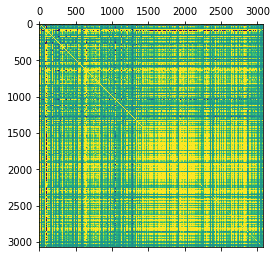

In [41]:
covmat = fafit.get_covariance()
im = plt.matshow(covmat)
im.set_clim((-0.002,0.002))
#covmat.min()

In [56]:
print(X1.shape)
print(X2.shape)

(792, 1407)
(792, 1665)


In [65]:
crcov = covmat[1407:,:1407]

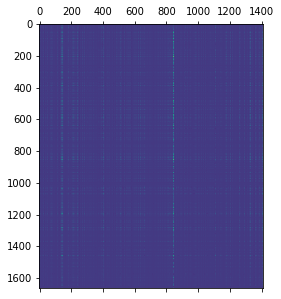

In [66]:
plt.matshow(crcov)

(1665,)


(array([  5., 412., 657., 346., 133.,  57.,  25.,  17.,   8.,   5.]),
 array([-4.09226050e-04,  1.44852532e-05,  4.38196556e-04,  8.61907860e-04,
         1.28561916e-03,  1.70933047e-03,  2.13304177e-03,  2.55675307e-03,
         2.98046438e-03,  3.40417568e-03,  3.82788698e-03]),
 <BarContainer object of 10 artists>)

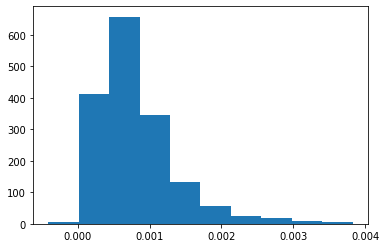

In [91]:
mcov = np.median(crcov, axis=1)
print(mcov.shape)
plt.hist(mcov)

In [134]:
obidx = np.where(mcov>0.002)
xx = X2.columns[obidx]
idxmat = np.array(list(xx))
plane = 0
idxmat[idxmat[:,0]==plane, 1]


array([  1,   2,   4,   5,   6,  13,  17,  20,  23,  24,  27,  28,  29,
        30,  35,  38,  55,  58,  59,  60,  61,  66,  77,  80,  96,  97,
        99, 100, 104, 114, 116, 127, 131, 132, 139, 140, 146, 155, 157,
       161, 165, 181, 185, 186, 193, 197, 205, 210, 245, 252, 256, 263,
       269, 311, 315, 319, 320, 340, 352, 357, 359, 363, 366, 371, 380,
       381, 392, 404, 414, 429, 440, 445, 451, 469, 471, 473, 486, 493,
       504])

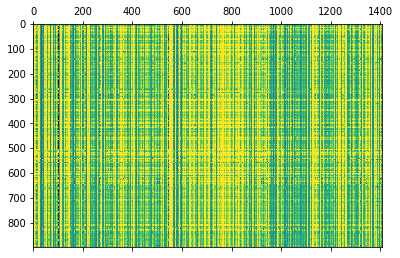

In [106]:
im = plt.matshow(crcov[mcov>0.001,:])
im.set_clim((-0.002,0.002))

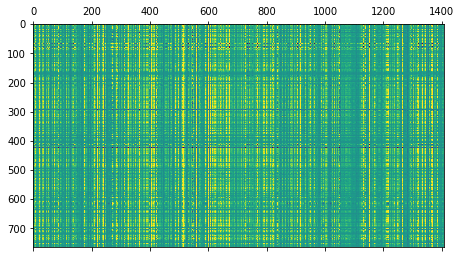

In [107]:
im = plt.matshow(crcov[mcov<=0.001,:])
im.set_clim((-0.002,0.002))

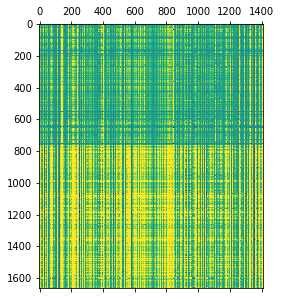

In [108]:
xx = np.concatenate((crcov[mcov<=0.001,:], crcov[mcov>0.001,:]),axis=0)
im = plt.matshow(xx)
im.set_clim((-0.002,0.002))

(1665,)


(array([ 16., 503., 623., 304., 113.,  53.,  26.,  15.,   8.,   4.]),
 array([-5.52756263e-04,  9.01599832e-05,  7.33076230e-04,  1.37599248e-03,
         2.01890872e-03,  2.66182497e-03,  3.30474122e-03,  3.94765746e-03,
         4.59057371e-03,  5.23348995e-03,  5.87640620e-03]),
 <BarContainer object of 10 artists>)

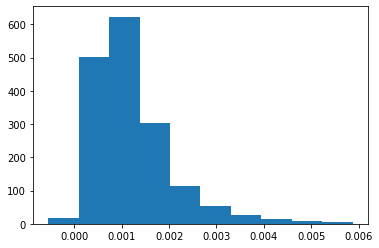

In [92]:
mcov = np.mean(crcov, axis=1)
print(mcov.shape)
plt.hist(mcov)

In [83]:

from sklearn.cluster import KMeans, AgglomerativeClustering
# Standardize tuning curve
H = crcov.transpose()
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(H.transpose())

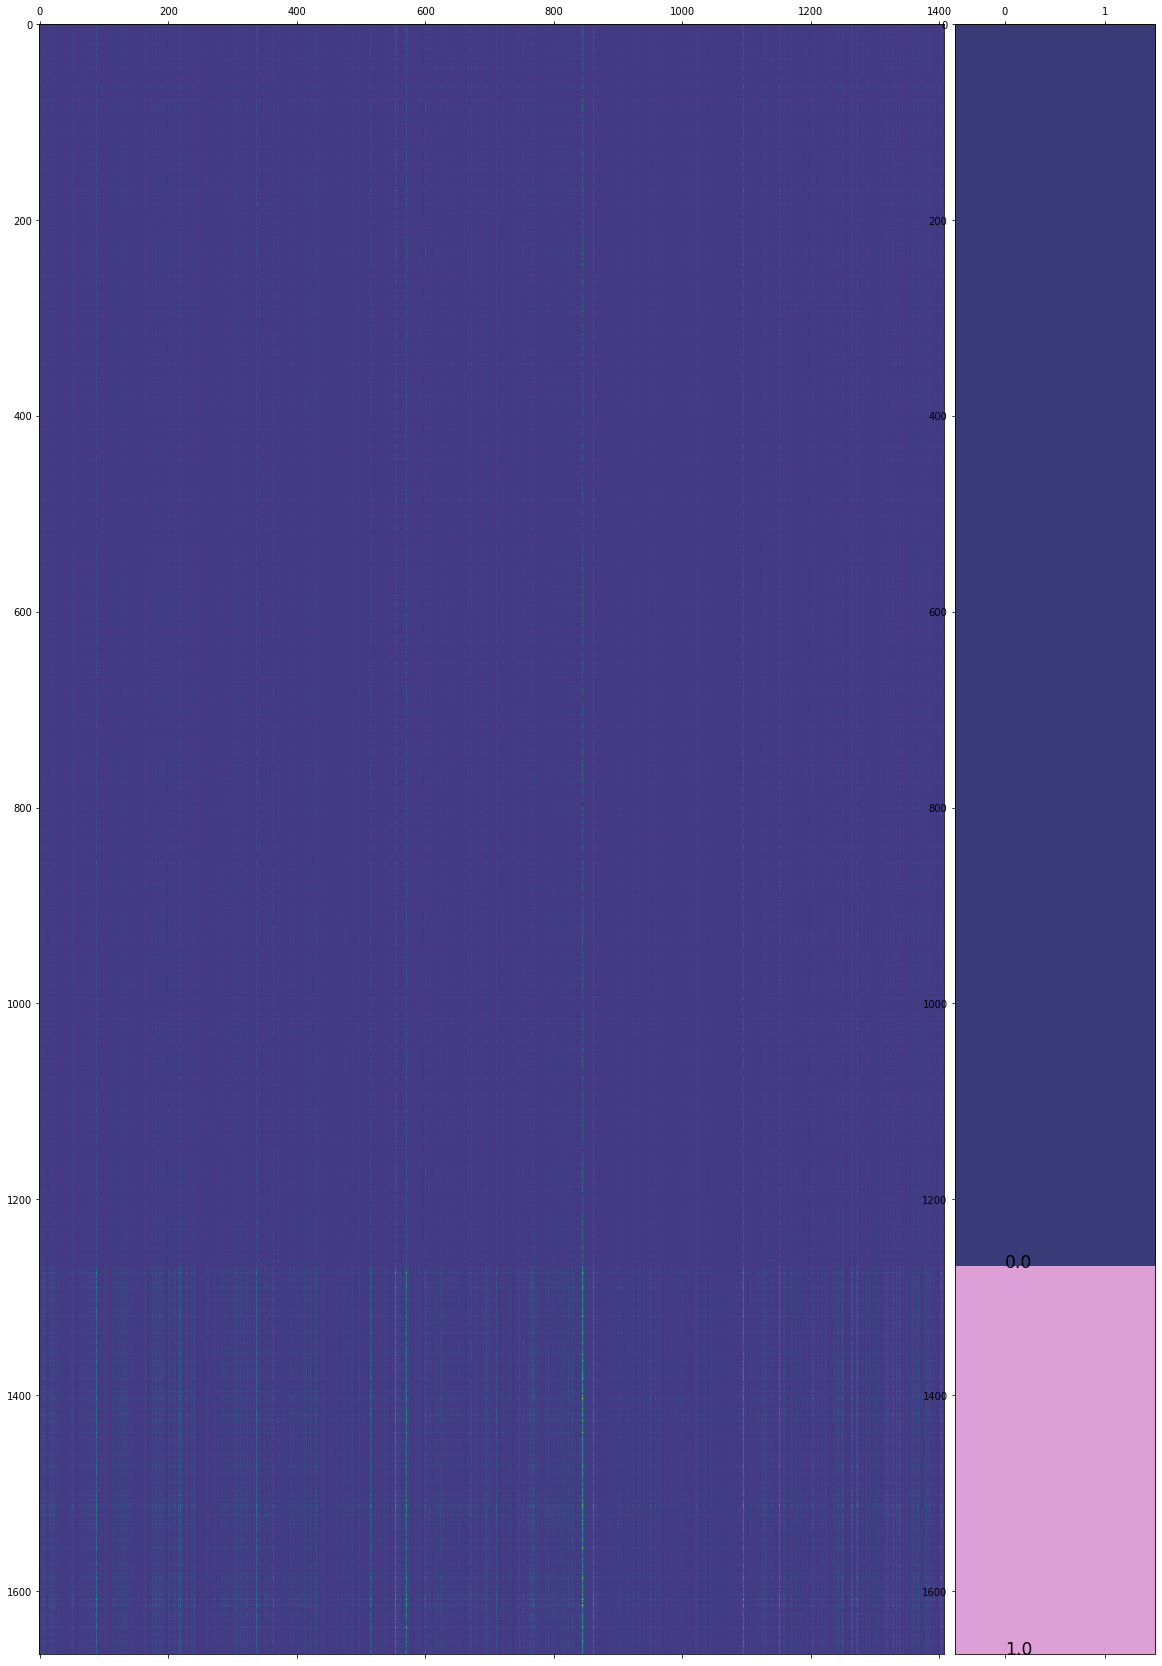

In [84]:
importlib.reload(catclust)
catclust.plot_clustered_heatmap(pd.DataFrame(H), kmeans)

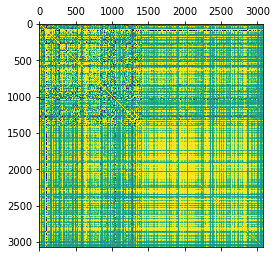

In [55]:
covmat2 = XC.cov()
im2 = plt.matshow(covmat2)
im2.set_clim((-0.002,0.002))

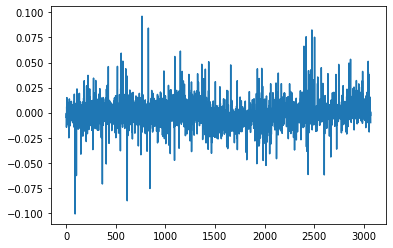

In [45]:
comp = fafit.components_
# xx = plt.plot(comp.transpose())
plt.plot(comp[3,:])

In [47]:
X_transformed = fafit.transform(X)

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


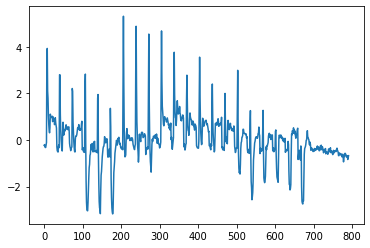

In [53]:
xx = plt.plot(X_transformed[:,4])

In [7]:
n_features = 50
n_components = np.arange(0, n_features, 5)  # options for n_components


def compute_scores(X):
    pca = PCA(svd_solver="full")
    fa = FactorAnalysis()

    pca_scores, fa_scores = [], []
    for n in n_components:
        print(n)
        pca.n_components = n
        fa.n_components = n
        pca_scores.append(np.mean(cross_val_score(pca, X)))
        fa_scores.append(np.mean(cross_val_score(fa, X)))

    return pca_scores, fa_scores

In [86]:
X = XC
pca_scores, fa_scores = compute_scores(X)
n_components_pca = n_components[np.argmax(pca_scores)]
n_components_fa = n_components[np.argmax(fa_scores)]


0


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

5


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

10


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

15


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

20


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

25


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

30


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

35


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

40


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

45


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

best n_components by PCA CV = 45
best n_components by FactorAnalysis CV = 5


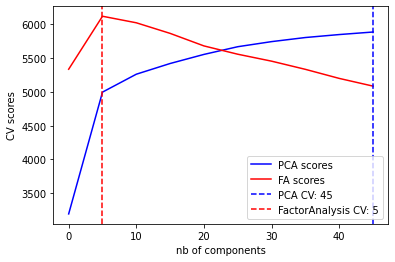

In [88]:
    print("best n_components by PCA CV = %d" % n_components_pca)
    print("best n_components by FactorAnalysis CV = %d" % n_components_fa)
    plt.figure()
    plt.plot(n_components, pca_scores, "b", label="PCA scores")
    plt.plot(n_components, fa_scores, "r", label="FA scores")
    #plt.axvline(rank, color="g", label="TRUTH: %d" % rank, linestyle="-")
    plt.axvline(
        n_components_pca,
        color="b",
        label="PCA CV: %d" % n_components_pca,
        linestyle="--",
    )
    plt.axvline(
        n_components_fa,
        color="r",
        label="FactorAnalysis CV: %d" % n_components_fa,
        linestyle="--",
    )
    
    plt.xlabel("nb of components")
    plt.ylabel("CV scores")
    plt.legend(loc="lower right")

In [ ]:
def compute_pca(pattern, n_components, tbin=5):
    pca = decomposition.PCA(n_components)
    latent = pca.fit_transform(pattern)
    results = dict(latent=latent, index=pattern.index, pca=pca)
    return results


In [97]:
fa = FactorAnalysis(n_components=6)
#fafit = fa.fit(X)
X_transformed = fa.fit_transform(X)

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


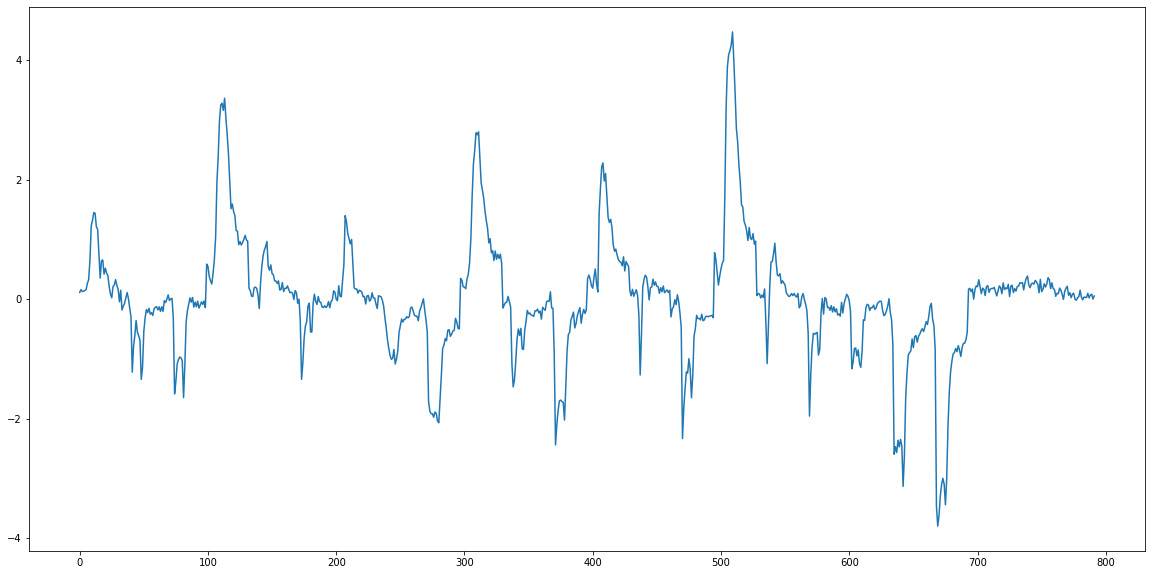

In [104]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(X_transformed[:,5])

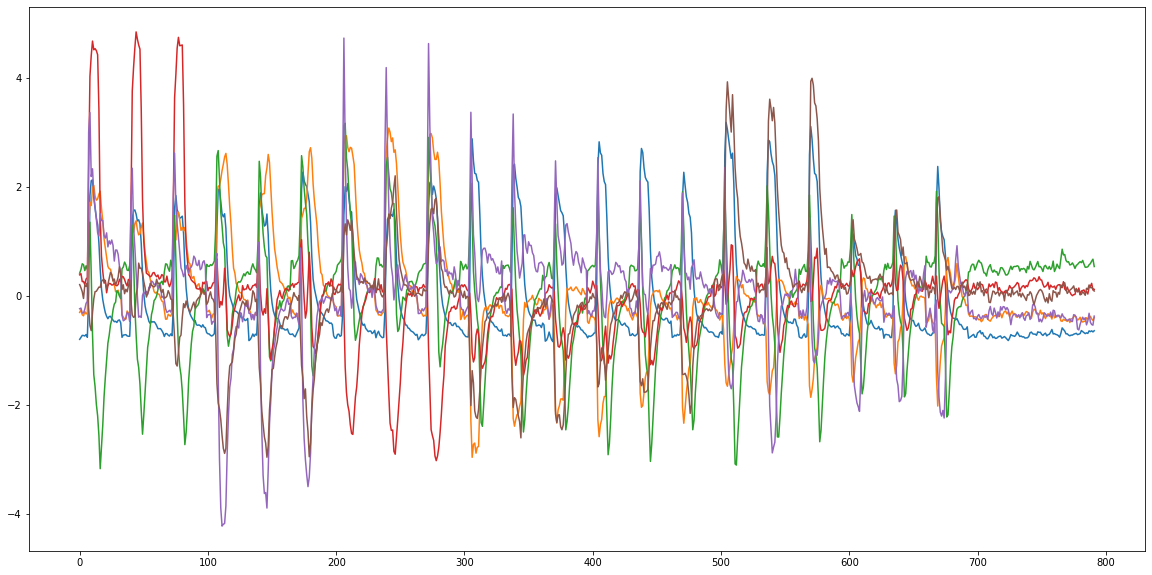

In [55]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(X_transformed)

In [43]:
fa = FactorAnalysis(n_components=6)
fafit = fa.fit(X)

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [75]:
X_transformed = fa.fit_transform(X)
X_transformed.shape

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


(792, 6)

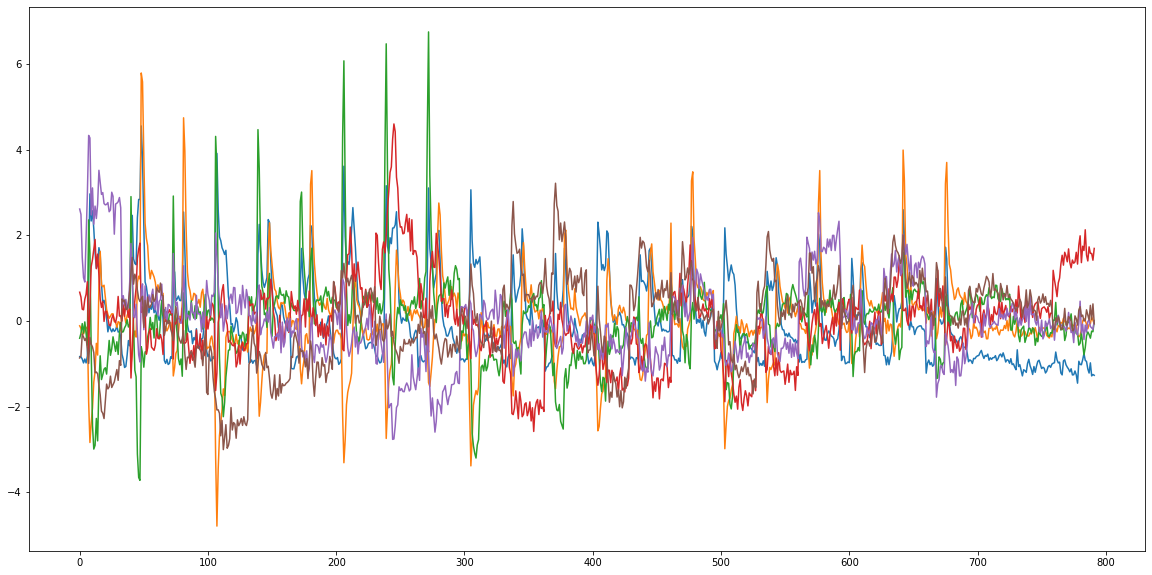

In [87]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(X_transformed)

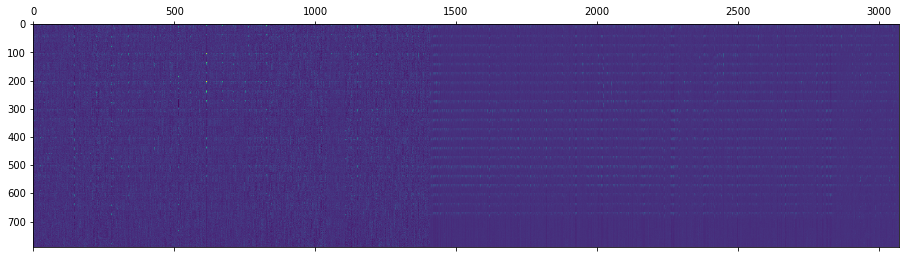

In [96]:
X1 = std_pattern_dict['Dp'][exp_name]
X2 = std_pattern_dict['OB'][exp_name]
scale = 4
XC = pd.concat([X1*scale,X2],axis=1)
plt.matshow(XC)

In [92]:
X1.max()

plane  neuron
0      0         0.076597
       1         0.140247
       2         0.112165
       3         0.098287
       4         0.083769
                   ...   
3      349       0.119119
       350       0.203622
       351       0.436689
       352       0.106603
       353       0.134964
Length: 1407, dtype: float64

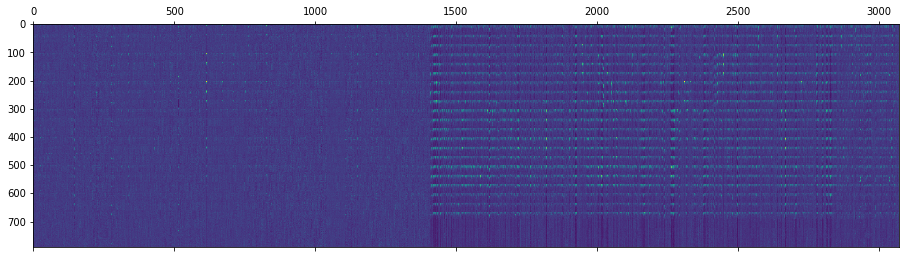

In [91]:
plt.matshow(XC)